# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.12/x64/bin/python -m pip install --upgrade pip' command.


#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


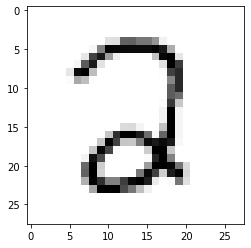

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2453
Training Accuracy: 0.6100, Testing Accuracy: 0.6174



Epoch 10, Loss 0.1101
Training Accuracy: 0.9216, Testing Accuracy: 0.9269



Epoch 20, Loss 0.0601
Training Accuracy: 0.9415, Testing Accuracy: 0.9461



Epoch 30, Loss 0.046
Training Accuracy: 0.9508, Testing Accuracy: 0.9582



Epoch 40, Loss 0.0396
Training Accuracy: 0.9576, Testing Accuracy: 0.9647



Epoch 50, Loss 0.0358
Training Accuracy: 0.9599, Testing Accuracy: 0.9682



Epoch 60, Loss 0.0333
Training Accuracy: 0.9621, Testing Accuracy: 0.9708



Epoch 70, Loss 0.0314
Training Accuracy: 0.9646, Testing Accuracy: 0.9698



Epoch 80, Loss 0.0299
Training Accuracy: 0.9659, Testing Accuracy: 0.9708



Epoch 90, Loss 0.0287
Training Accuracy: 0.9666, Testing Accuracy: 0.9693



Epoch 100, Loss 0.0277
Training Accuracy: 0.9676, Testing Accuracy: 0.9698



Epoch 110, Loss 0.0269
Training Accuracy: 0.9688, Testing Accuracy: 0.9708



Epoch 120, Loss 0.0261
Training Accuracy: 0.9700, Testing Accuracy: 0.9713



Epoch 130, Loss 0.0254
Training Accuracy: 0.9705, Testing Accuracy: 0.9718



Epoch 140, Loss 0.0248
Training Accuracy: 0.9712, Testing Accuracy: 0.9713



Epoch 150, Loss 0.0242
Training Accuracy: 0.9722, Testing Accuracy: 0.9713



Epoch 160, Loss 0.0237
Training Accuracy: 0.9727, Testing Accuracy: 0.9713



Epoch 170, Loss 0.0232
Training Accuracy: 0.9734, Testing Accuracy: 0.9713



Epoch 180, Loss 0.0228
Training Accuracy: 0.9739, Testing Accuracy: 0.9713



Epoch 190, Loss 0.0223
Training Accuracy: 0.9747, Testing Accuracy: 0.9713



Epoch 200, Loss 0.0219
Training Accuracy: 0.9753, Testing Accuracy: 0.9723



Epoch 210, Loss 0.0215
Training Accuracy: 0.9760, Testing Accuracy: 0.9718



Epoch 220, Loss 0.0212
Training Accuracy: 0.9763, Testing Accuracy: 0.9718



Epoch 230, Loss 0.0208
Training Accuracy: 0.9769, Testing Accuracy: 0.9718



Epoch 240, Loss 0.0204
Training Accuracy: 0.9775, Testing Accuracy: 0.9723



Epoch 250, Loss 0.0201
Training Accuracy: 0.9778, Testing Accuracy: 0.9728



0.010230689018155145

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2566
Training Accuracy: 0.6209, Testing Accuracy: 0.6376



Epoch 10, Loss 0.1061
Training Accuracy: 0.9054, Testing Accuracy: 0.9133



Epoch 20, Loss 0.0807
Training Accuracy: 0.9259, Testing Accuracy: 0.9400



Epoch 30, Loss 0.0691
Training Accuracy: 0.9350, Testing Accuracy: 0.9451



Epoch 40, Loss 0.0621
Training Accuracy: 0.9396, Testing Accuracy: 0.9496



Epoch 50, Loss 0.0574
Training Accuracy: 0.9436, Testing Accuracy: 0.9521



Epoch 60, Loss 0.054
Training Accuracy: 0.9464, Testing Accuracy: 0.9572



Epoch 70, Loss 0.0514
Training Accuracy: 0.9485, Testing Accuracy: 0.9602



Epoch 80, Loss 0.0493
Training Accuracy: 0.9504, Testing Accuracy: 0.9627



Epoch 90, Loss 0.0475
Training Accuracy: 0.9523, Testing Accuracy: 0.9627



Epoch 100, Loss 0.0461
Training Accuracy: 0.9540, Testing Accuracy: 0.9642



Epoch 110, Loss 0.0448
Training Accuracy: 0.9547, Testing Accuracy: 0.9632



Epoch 120, Loss 0.0438
Training Accuracy: 0.9553, Testing Accuracy: 0.9642



Epoch 130, Loss 0.0428
Training Accuracy: 0.9560, Testing Accuracy: 0.9642



Epoch 140, Loss 0.042
Training Accuracy: 0.9568, Testing Accuracy: 0.9657



Epoch 150, Loss 0.0412
Training Accuracy: 0.9573, Testing Accuracy: 0.9662



Epoch 160, Loss 0.0405
Training Accuracy: 0.9579, Testing Accuracy: 0.9662



Epoch 170, Loss 0.0399
Training Accuracy: 0.9586, Testing Accuracy: 0.9662



Epoch 180, Loss 0.0393
Training Accuracy: 0.9591, Testing Accuracy: 0.9662



Epoch 190, Loss 0.0388
Training Accuracy: 0.9593, Testing Accuracy: 0.9662



Epoch 200, Loss 0.0383
Training Accuracy: 0.9597, Testing Accuracy: 0.9662



Epoch 210, Loss 0.0379
Training Accuracy: 0.9603, Testing Accuracy: 0.9667



Epoch 220, Loss 0.0375
Training Accuracy: 0.9604, Testing Accuracy: 0.9667



Epoch 230, Loss 0.0371
Training Accuracy: 0.9609, Testing Accuracy: 0.9672



Epoch 240, Loss 0.0367
Training Accuracy: 0.9611, Testing Accuracy: 0.9672



Epoch 250, Loss 0.0364
Training Accuracy: 0.9614, Testing Accuracy: 0.9672



0.04460562624264232

### Comparing results of NN and LR

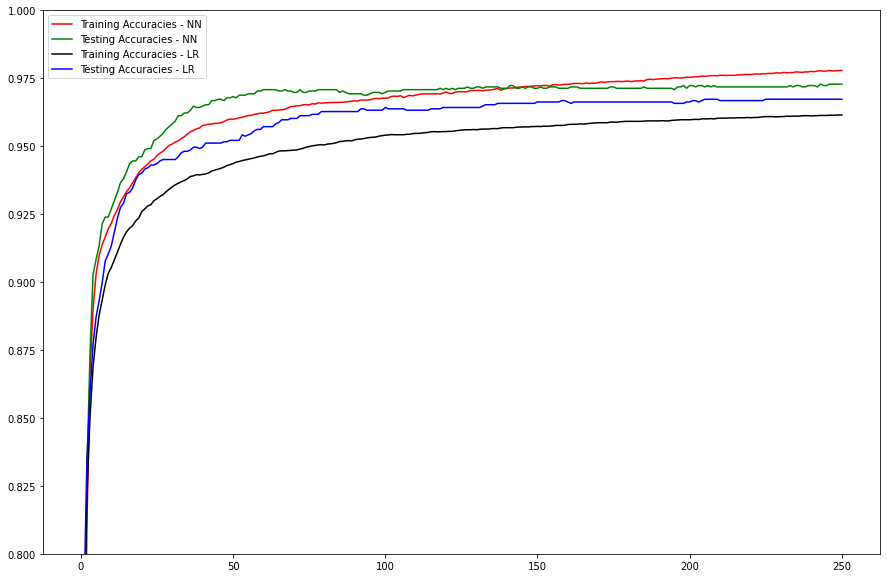

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

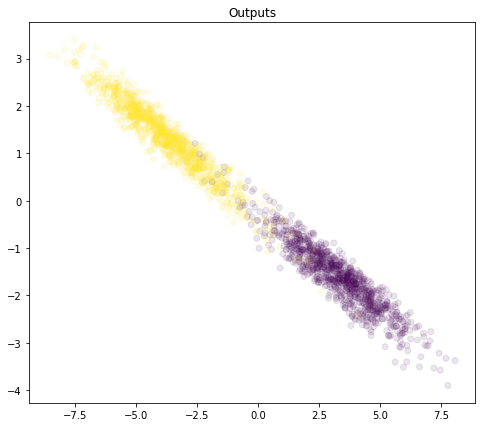

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

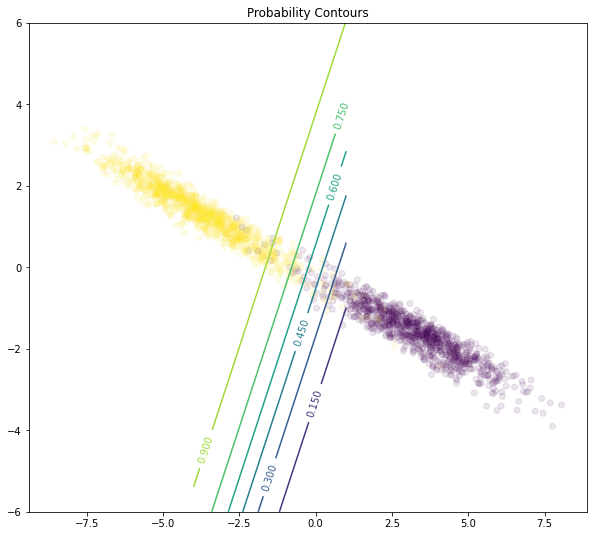

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );